In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('/Users/danteschrantz/Desktop/UNAV/2024-2025/Modeling Trabajo Final/dairy.csv')
df.head()

,FARM,YEAR,COWS,LAND,MILK,LABOR,FEED,YIT,X1,X2,...,X14,X23,X24,X34,YEAR93,YEAR94,YEAR95,YEAR96,YEAR97,YEAR98
0,1,93,15.3,8.0,73647,2.0,33435.738,11.207039,-0.250847,-0.381269,...,0.067232,-0.090008,0.102187,-0.063272,1,0,0,0,0,0
1,1,94,18.1,8.0,91260,2.0,36869.040,11.421468,-0.082788,-0.381269,...,0.014096,-0.090008,0.064919,-0.040197,0,1,0,0,0,0
2,1,97,17.1,7.0,110419,2.0,51013.578,11.612037,-0.139622,-0.514801,...,-0.021564,-0.121532,-0.079510,0.036461,0,0,0,0,1,0
3,1,96,17.3,8.0,111454,2.0,50711.570,11.621367,-0.127994,-0.381269,...,-0.019008,-0.090008,-0.056622,0.035060,0,0,0,1,0,0
4,1,95,17.8,8.0,118498,2.0,54153.586,11.682651,-0.099502,-0.381269,...,-0.021311,-0.090008,-0.081660,0.050563,0,0,1,0,0,0


# Gráficos en Python 

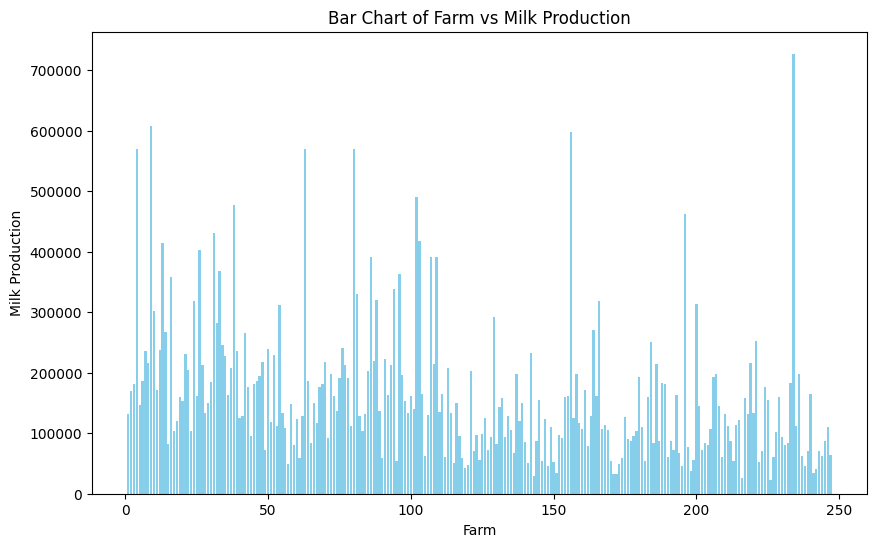

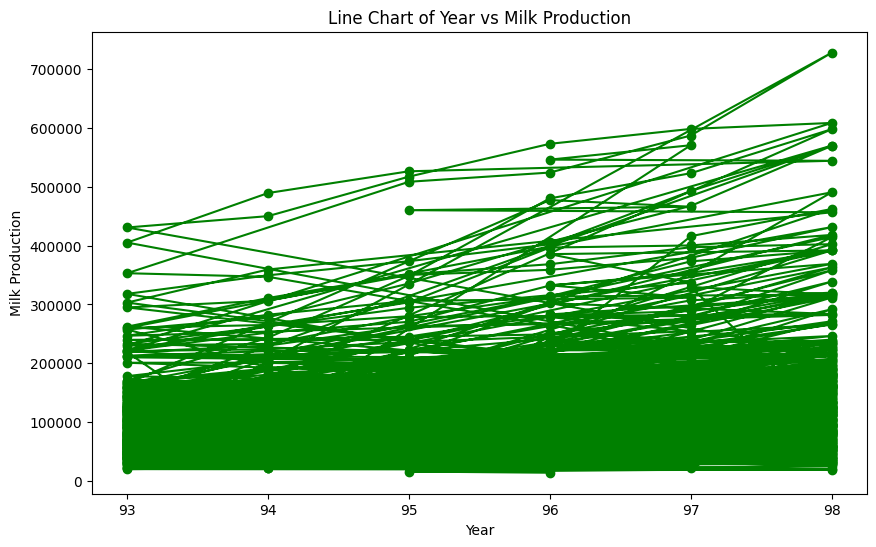

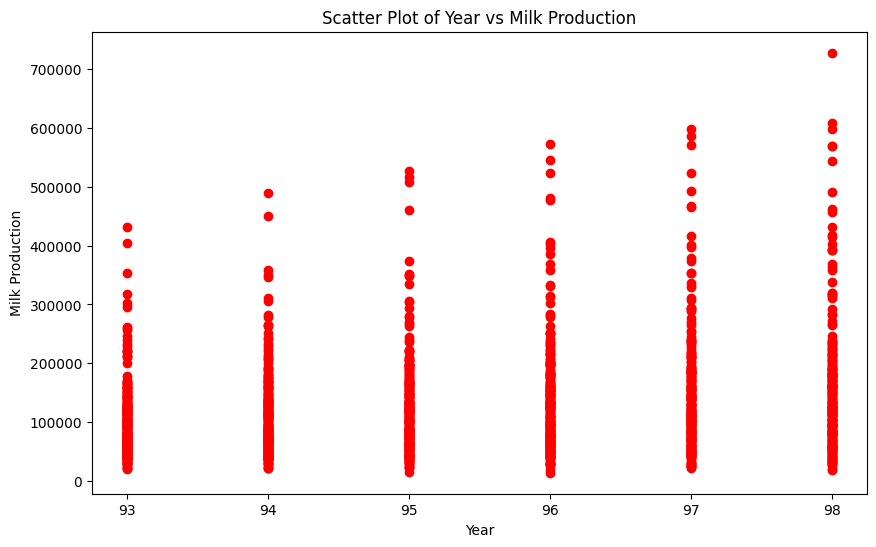

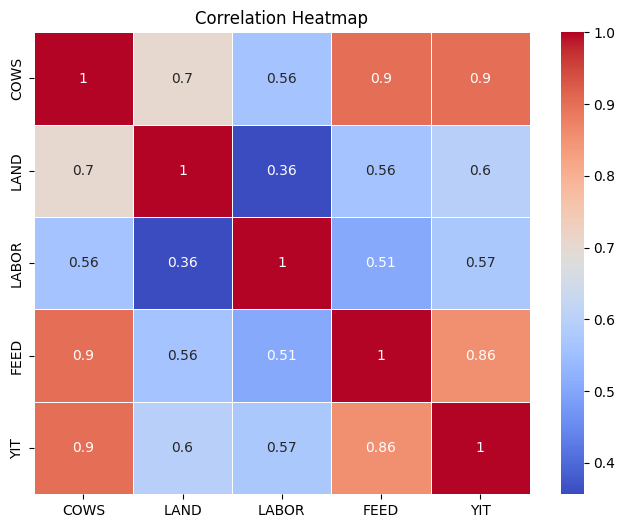

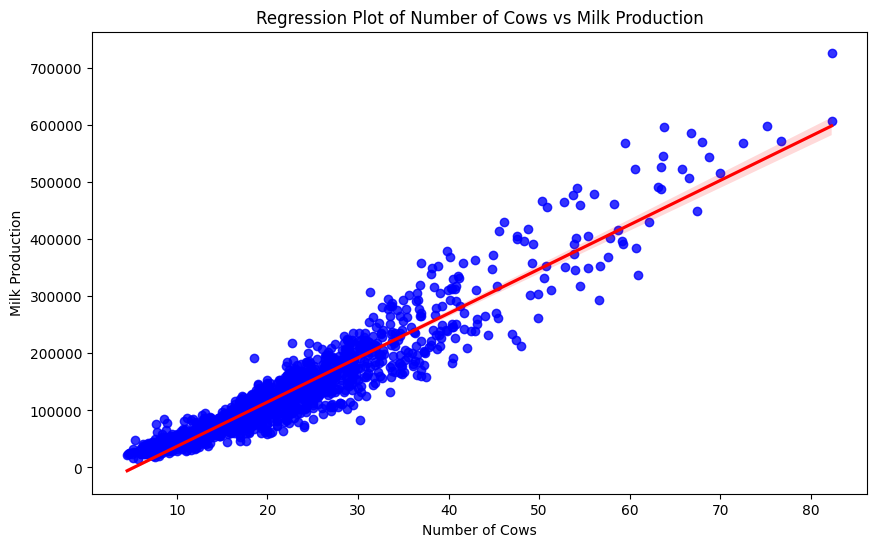

In [21]:
# Bar Chart
def plot_bar_chart(df):
    plt.figure(figsize=(10, 6))
    plt.bar(df['FARM'], df['MILK'], color='skyblue')
    plt.xlabel('Farm')
    plt.ylabel('Milk Production')
    plt.title('Bar Chart of Farm vs Milk Production')
    plt.show()

# Line Chart
def plot_line_chart(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['YEAR'], df['MILK'], marker='o', linestyle='-', color='green')
    plt.xlabel('Year')
    plt.ylabel('Milk Production')
    plt.title('Line Chart of Year vs Milk Production')
    plt.show()

# Scatter Plot
def plot_scatter_chart(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['YEAR'], df['MILK'], color='red')
    plt.xlabel('Year')
    plt.ylabel('Milk Production')
    plt.title('Scatter Plot of Year vs Milk Production')
    plt.show()

# Correlation Heatmap
def plot_heatmap(df):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['COWS', 'LAND', 'LABOR', 'FEED', 'YIT']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Regression Plot
def plot_regression(df):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='COWS', y='MILK', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.xlabel('Number of Cows')
    plt.ylabel('Milk Production')
    plt.title('Regression Plot of Number of Cows vs Milk Production')
    plt.show()

# Function Calls
plot_bar_chart(df)
plot_line_chart(df)
plot_scatter_chart(df)
plot_heatmap(df)
plot_regression(df)

# Modelo de Machine Learning con Random Forest

Error Cuadrático Medio (MSE): 349563140.22904617
Raíz del Error Cuadrático Medio (RMSE): 18696.607719825704
Porcentaje de Error Promedio (MAPE): 11.12%
Coeficiente de Determinación (R²): 0.9520491058859036


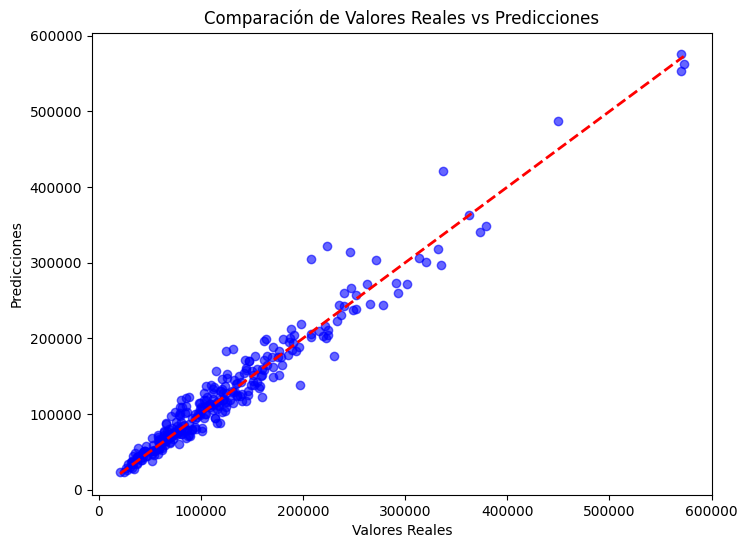

In [22]:
# También eliminar variables relacionadas con años si no aportan información relevante
X = df.drop(columns=['MILK', 'YIT', 'X1', 'X2', 'X3', 'X4', 'X11', 'X12', 'X13', 'X14', 'X22', 'X33', 'X44', 'X23', 'X24', 'X34', 'YEAR93', 'YEAR94', 'YEAR95', 'YEAR96', 'YEAR97', 'YEAR98 '])  # Eliminar las variables no necesarias
y = df['MILK']  # 'MILK' como objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Porcentaje de Error Promedio (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinación (R²): {r2}")

# Visualizar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Reales vs Predicciones")
plt.show()


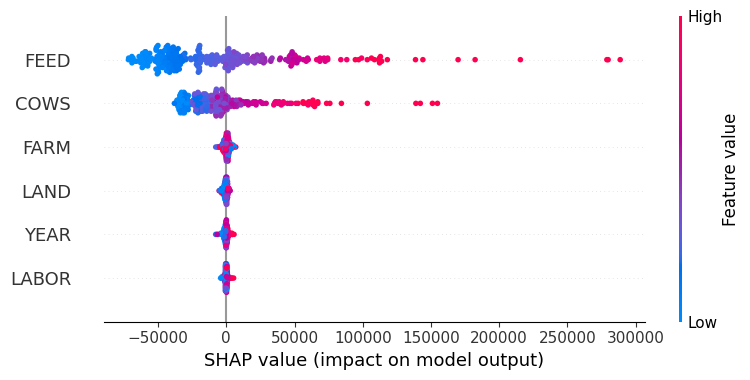

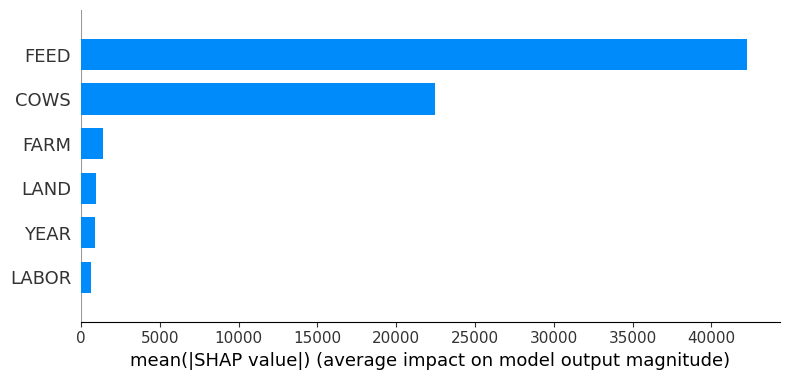

In [23]:
# ---- Explicabilidad del Modelo con SHAP ----
import shap
# Crear un objeto explainer para el modelo Random Forest
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP para el conjunto de datos de prueba
shap_values = explainer.shap_values(X_test)

# Resumen de los valores SHAP
shap.summary_plot(shap_values, X_test)  # Gráfico de resumen

# Gráfico de barras con la importancia media de las características
shap.summary_plot(shap_values, X_test, plot_type="bar")